In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
df=pd.read_csv("Lung_Cancer.csv")

In [3]:
df.head(10)

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


In [4]:
df.tail(10)

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
49,Katharine,Hepburn,62,20,5,6,1
50,Katharine,Hepburn,42,12,6,2,0
51,Barbra,Streisand,44,30,1,6,1
52,Maggie,Smith,26,34,1,8,1
53,Glenda,Jackson,35,20,5,1,0
54,Ernest,Borgnine,26,13,6,1,0
55,Alec,Guinness,77,20,5,4,1
56,Charlton,Heston,75,15,3,5,1
57,Gregory,Peck,43,30,3,8,1
58,Sidney,Poitier,51,25,9,0,0


## Find Null Values

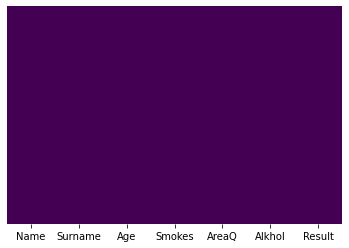

In [5]:
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Exploratory Data Analysis

## 1. Univariate Analysis

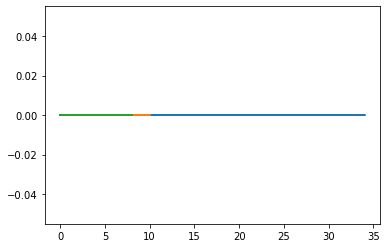

In [6]:
plt.plot(df['Smokes'],np.zeros_like(df['Smokes']))
plt.plot(df['AreaQ'],np.zeros_like(df['AreaQ']))
plt.plot(df['Alkhol'],np.zeros_like(df['Alkhol']))

## 2. Bivariate Analysis

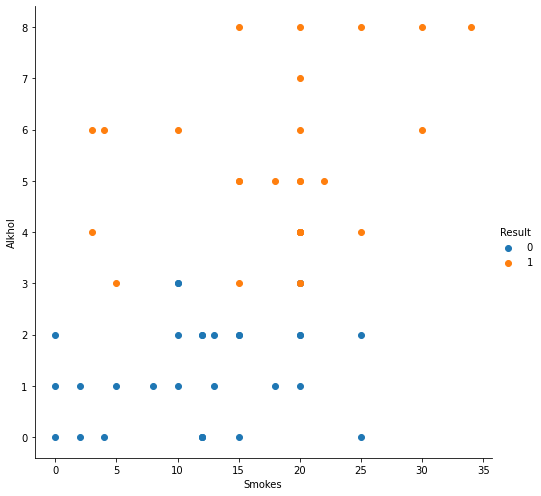

In [7]:
sn.FacetGrid(df,hue='Result',height=7).map(plt.scatter,'Smokes','Alkhol').add_legend()
plt.show()

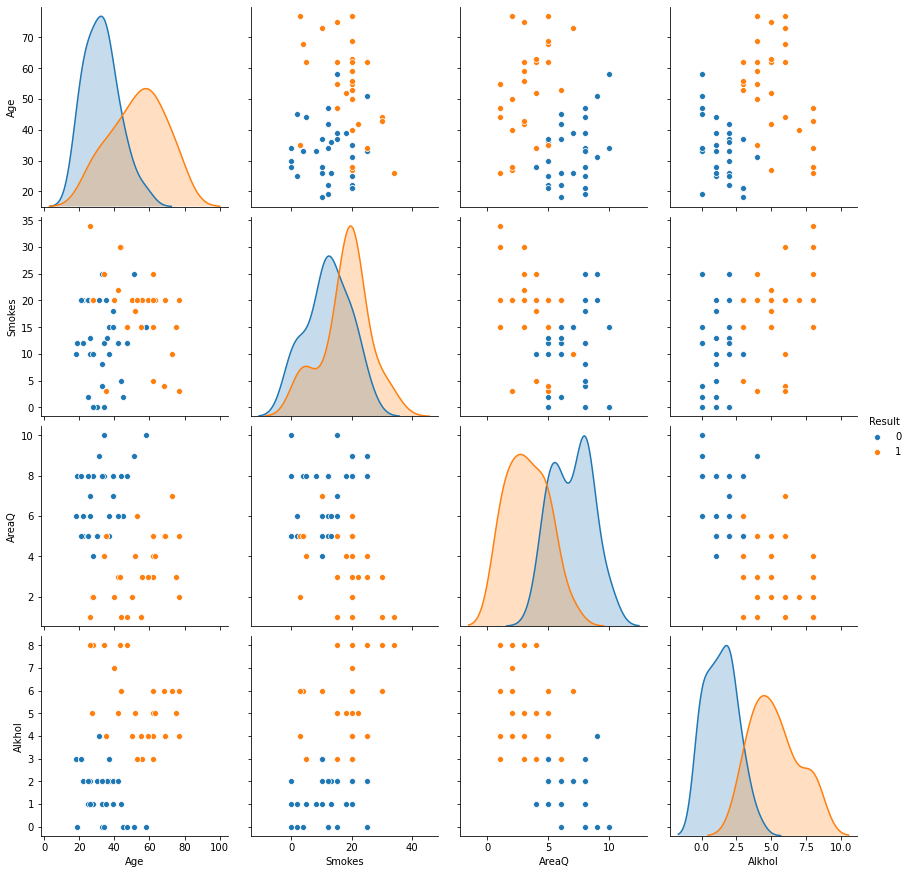

In [8]:
sn.pairplot(df,hue='Result',height=3)

In [9]:
X = df.drop(['Surname','Name','Result'],axis=1)
X.head()

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6


In [10]:
Y = df['Result']
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: Result, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2)

In [13]:
len(x_train)

47

In [14]:
len(x_test)

12

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model= LogisticRegression()

In [17]:
model.fit(x_train,y_train)

LogisticRegression()

In [18]:
model.score(x_test,y_test)

0.8333333333333334

In [19]:
prediction=model.predict(x_test)

In [20]:
from sklearn.metrics import classification_report ,confusion_matrix

In [21]:
con= confusion_matrix(y_test,prediction)

In [22]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.67      0.80         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12



Text(69.0, 0.5, 'Truth')

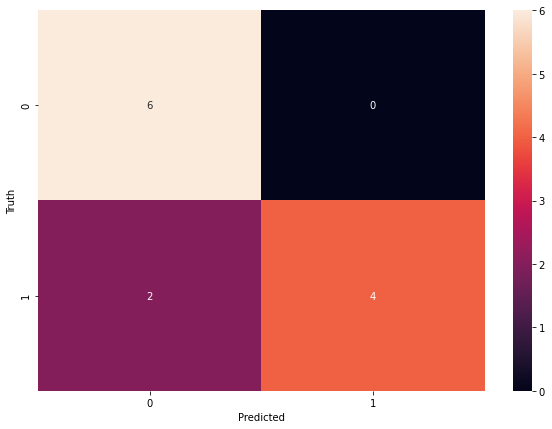

In [23]:
plt.figure(figsize=(10,7))
sn.heatmap(con,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")